In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize as opt
%matplotlib inline

In [2]:
# clean all files to text files
def cleanfiles(rawfolder="235RC/"):
    listdir=os.listdir(rawfolder)
    count=0
    for path in listdir:
        if not path.endswith(".txt") and os.path.isfile(os.path.join("235RC",path)):
            print("adding .txt to : ",path)
            os.rename(os.path.join("235RC",path),os.path.join("235RC",path+".txt"))
            count+=1
    print(count,"files textified")

In [3]:

def npcombinesweep(path1,path2):
    data1=np.genfromtxt(path1,skip_header=1)
    mult1=[  [-1,1]  if x<len(data1)/2 else [1,1] for x in range(len(data1))]
    
    
    data2=np.genfromtxt(path2,skip_header=1)
    mult2=[  [-1,1]  if x>len(data2)/2 else [1,1] for x in range(len(data2))]
    
    data=np.concatenate((data2*mult1,data1*mult2),axis=0)
    np.savetxt(os.path.splitext(path1)[0][:-2]+".txt",data,delimiter='\t',header="Vg\tIds",comments='')
    os.path.splitext(path1)[0][:-2]+".txt"
    os.remove(path1)
    os.remove(path2)
    



def checkduplicates(folder):
    """checks for 2 part files in the directory and combines them in a 1 then 2 format.
    files should be named ABC_runXX-1.txt and ABC_runXX-2 where ABC and XX must be the same in both parts of the data
    but can be any arbitrary strings."""
    count=0
    listdir=os.listdir(folder)            
    for path in listdir:
        combine=[]
        #this conditional ensures that only 2 part files will be processed by ensuring that there must be
        #a "-" after "run" in the filename indicating multiple parts
        if path[path.find("run"):].find('-')!=-1:
            for path2 in listdir:        
                if path[:-5] in path2 and path!=path2:
                    #ensures that the files are appended in the correct order
                    if path[-5:-4]>path2[-5:-4]:
                        combine=[os.path.join("235RC",path),os.path.join("235RC",path2)]
                    else:
                        combine=[os.path.join("235RC",path2),os.path.join("235RC",path)]
                    npcombinesweep(combine[0],combine[1])
                    print(combine)
                    count+=1
                    listdir.remove(path)
                    listdir.remove(path2)
    print(count,"file pairs combined")

In [4]:
cleanfiles()

adding .txt to :  235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-09_run2-2
adding .txt to :  235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-09_run2-1
adding .txt to :  235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop30updown_2016-07-09_run5-2
adding .txt to :  235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop30updown_2016-07-09_run5-1
adding .txt to :  235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop20updown_2016-07-09_run4-2
adding .txt to :  235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop20updown_2016-07-09_run4-1
adding .txt to :  235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop10updown_2016-07-09_run3-2
adding .txt to :  235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop10updown_2016-07-09_run3-1
adding .txt to :  235RC_pin06-10_IdsT_Vds10mV_Vg0constant_2016-07-09_run1
9 files textified


In [5]:
checkduplicates("235RC/")   

['235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-09_run2-2.txt', '235RC/235RC_pin06-10_VgIds_Vds10mV_Vg30updown_2016-07-09_run2-1.txt']
['235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop30updown_2016-07-09_run5-2.txt', '235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop30updown_2016-07-09_run5-1.txt']
['235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop20updown_2016-07-09_run4-2.txt', '235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop20updown_2016-07-09_run4-1.txt']
['235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop10updown_2016-07-09_run3-2.txt', '235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop10updown_2016-07-09_run3-1.txt']
4 file pairs combined


In [6]:
def plotsweepsback(ax,paths,title):
    listir=os.listdir("235RC/")
    for path in paths:
        
        data=np.genfromtxt(path,skip_header=1)
        ax.plot(data[:,0],data[:,1],".-",label="$\pm$"+path[37:37+path[37:].find('u')]+"Vg")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()
    
    
def plotsweepstop(ax,paths,title,labels="",colors=''):
    listir=os.listdir("235RC/")
    for path in paths:   
        data=np.genfromtxt(path,skip_header=1)
        if type(labels)!=list:
            ax.plot(data[:,0],data[:,1],".-",label=path[40:40+path[40:].find('u')])
        elif len(labels)==len(paths):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.index(path)],color=colors[paths.index(path)])
        else:
            print("Missmatch between labels and plots")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend(fontsize=15)

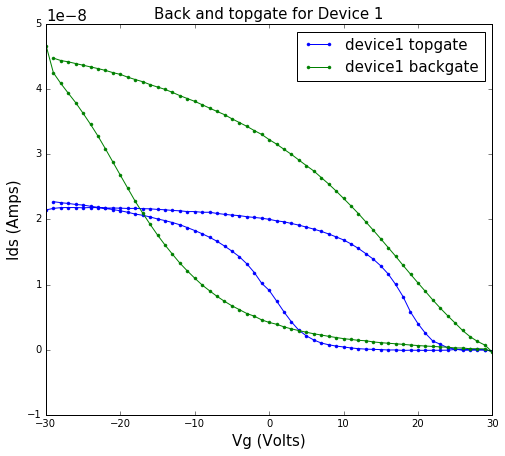

In [7]:

    
paths1=[
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg0_pin01Vtop30updown_2016-07-07_run14.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg0_pin01Vtop30updown_2016-07-05_run26.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg0_pin01Vtop30updown_2016-07-07_run3.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg0_pin01Vtop30updown_2016-07-08_run3.txt"
]
paths2=[
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg30updown_2016-07-01_run10.txt",
    "235RC/235RC_pin03-13_VgIds_Vds10mV_Vg30updown_2016-07-07_run13.txt"
]
labels1=["device1 topgate","device1 backgate"]
colors1=['b','g']
labels2=["run10 7/1/16","run13 7/7/16"]
# listdir=os.listdir("235RC/")
# for path in listdir:
#     if "2016-07-07" in path :
#         if "VgIds" in path and "Vg30" in path    :
#             paths1.append(os.path.join("235RC",path))
#         elif "VgIds" in path and "Vtop30" and "pin1" in path:
#             paths2.append(os.path.join("235RC",path))

# print(paths1,paths2)  

fig=plt.figure(figsize=(8,7))
ax2=plt.subplot(111)
plotsweepstop(ax2,[paths1[1],paths2[0]],title="Back and topgate for Device 1",labels=labels1,colors=colors1)

# fig.suptitle("235RC device1 comparison over proposed change in device state",fontsize=20,y=1.08)
offset_text = ax2.yaxis.get_offset_text()
offset_text.set_size(15)



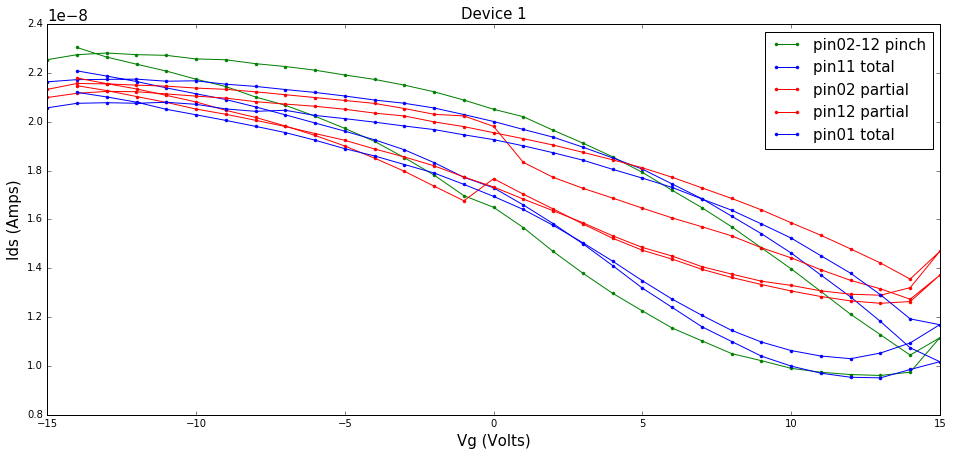

In [16]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if ("top15" in path or "pinch15" in path) and  "VgIds" in path and "Vg0" in path:
        if "03-13" in path:
            paths1.append(os.path.join("235RC",path))
        elif "06-10" in path:
            paths2.append(os.path.join("235RC",path))
def printlist(inlist):
    for i in inlist:
        print (i)
# print("paths1")
# printlist(paths1)
# print("paths2")
# printlist(paths2)
labels1=[
    "pin02-12 pinch",
    "pin11 total",
    "pin02 partial",
    "pin12 partial",
    "pin01 total"
]
colors1=['g','b','r','r','b']
labels2=[
    "pin09 partial",
    "pin05 partial",
    "pin05-09 pinch",
    "pin08 total",
    "pin04 total"
    
]
colors2=['r','r','g','b','b']
fig=plt.figure(figsize=(16,7))
ax1=plt.subplot(111)
plotsweepstop(ax1,paths1,"Device 1",labels=labels1,colors=colors1)
# ax2=plt.subplot(122)
# plotsweepstop(ax2,paths2,"Device 2",labels=labels2,colors=colors2)

# fig.suptitle("235RC topgate $\pm15V$ sweeps with $Vg = -5V$ for varying topgate pins, Vds=10mV",fontsize=20,y=1.08)
offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)
# offset_text = ax2.yaxis.get_offset_text()
# offset_text.set_size(15)
# fig.savefig(os.path.join("plots",) format="jpg")


paths1
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop20updown_2016-07-08_run13.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop10updown_2016-07-08_run12.txt
235RC/235RC_pin06-10_VgIds_Vds10mV_Vg0_pin4Vtop30updown_2016-07-08_run14.txt


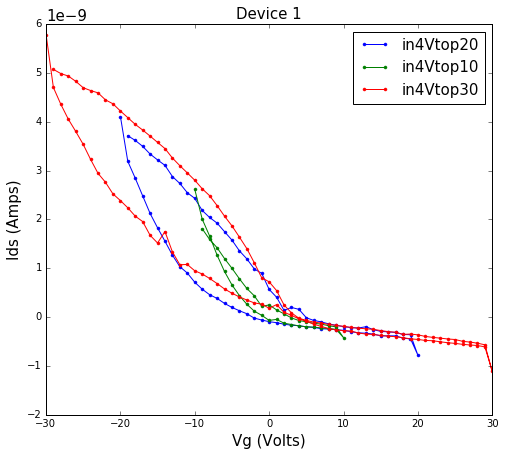

In [7]:
paths1,paths2=[],[]
listdir=os.listdir("235RC/")
for path in listdir:
    if "pin4" in path and  "VgIds" in path and "Vg0" in path and "2016-07-08" in path:
        paths1.append(os.path.join("235RC",path))
def printlist(inlist):
    for i in inlist:
        print (i)
print("paths1")
printlist(paths1)
# print("paths2")
# printlist(paths2)
labels1=[
    "pin02-12 pinch",
    "pin11 total",
    "pin02 partial",
    "pin12 partial",
    "pin01 total"
]
colors1=['g','b','r','r','b']

fig=plt.figure(figsize=(8,7))
ax1=plt.subplot(111)
plotsweepstop(ax1,paths1,"Device 1")#,labels=labels1,colors=colors1)


offset_text = ax1.yaxis.get_offset_text()
offset_text.set_size(15)

# fig.savefig(os.path.join("plots",) format="jpg")
